In [1]:
# import seaborn, pandas, numpy, and matplotlib

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in metric_results_by_gender dataframe

eo_results_gender = pd.read_csv("../Results/equalized_odds_metric_results_by_gender_coughvid_data.csv")
eo_results_gender.rename(columns = {"Female False Negative Rate Before" : "Female Before", 
                                    "Male False Negative Rate Before" : "Male Before", 
                                    "Female False Negative Rate After" : "Female After", 
                                    "Male False Negative Rate After" : "Male After",
                                    "Equalized Odds Ratio Gender Before" : "Before ",
                                    "Equalized Odds Ratio Gender After" : "After ", 
                                    "Equalized Odds Difference Gender Before" : "Before",
                                    "Equalized Odds Difference Gender After" : "After"}, 
                         inplace = True)

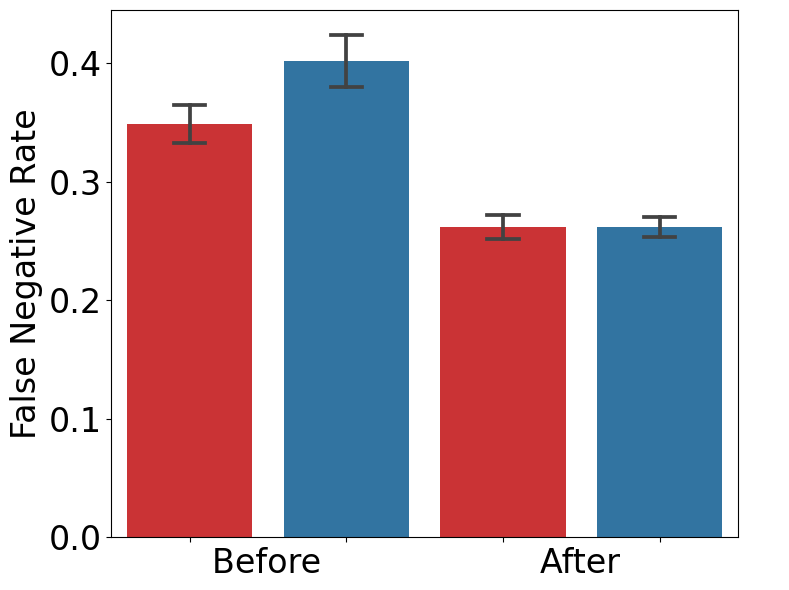

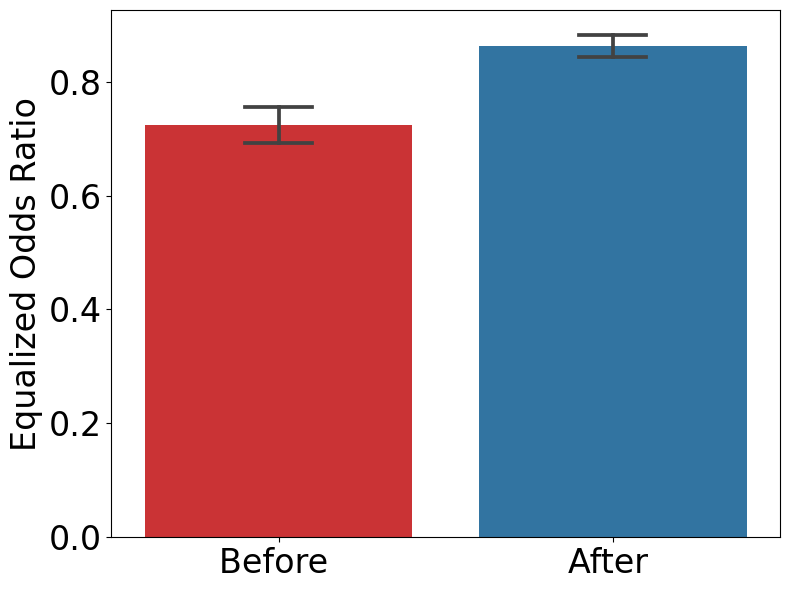

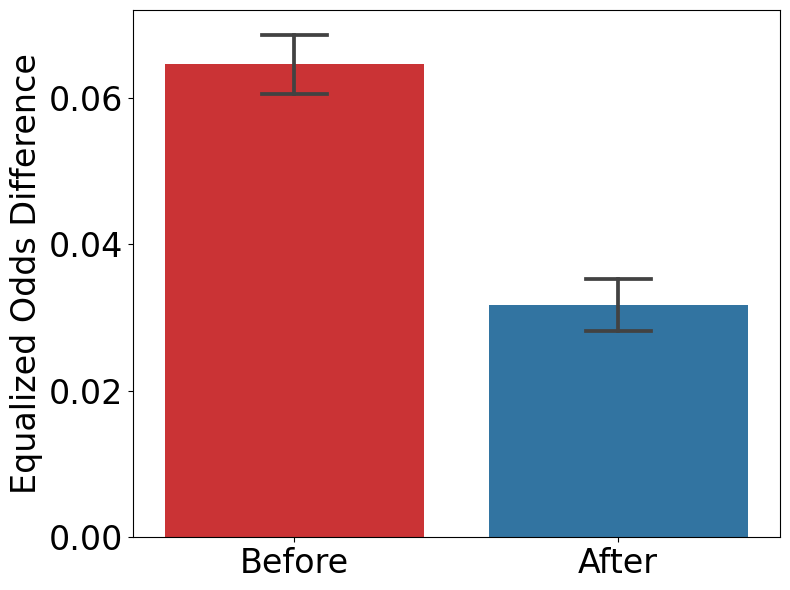

In [4]:
# define the gender metrics
# set up the color palette
# red for female, blue for male
# make barplots with error bars showing standard error

gender_metrics = {
    "False Negative Rate": ["Female Before", "Male Before", "Female After", "Male After"],
    "Equalized Odds Ratio": ["Before ", "After "],
    "Equalized Odds Difference": ["Before", "After"],
}

palette = {}


for metric, columns in gender_metrics.items():
    for column in columns:
        if "Female" in column:
            palette[column] = plt.cm.Paired(5)
        elif "Male" in column:
            palette[column] = plt.cm.Paired(1)
        elif "Before" in column:
            palette[column] = plt.cm.Paired(5)
        else:
            palette[column] = plt.cm.Paired(1)
            
for metric, columns in gender_metrics.items():
    plt.figure(figsize = (8, 6))
    
    eo_results_gender_metric = eo_results_gender[columns]
    eo_results_gender_metric_melted = eo_results_gender_metric.melt(var_name = "Gender", value_name = metric)
    
    gender = sns.barplot(x = "Gender", y = metric, data = eo_results_gender_metric_melted, estimator = np.mean, 
                errorbar = "se", capsize = 0.2, palette = palette)
        
    
    if metric == "False Negative Rate":
        gender.set_xticks(range(4))
        gender.set_xticklabels(["", "Before               ", "", 
                             "After               "])
    
    plt.xlabel("")
    plt.ylabel(metric)
    plt.rc("ytick", labelsize = 24)
    plt.rc("xtick", labelsize = 24)
    plt.rc('axes', labelsize = 24)

    plt.tight_layout()
    
    plt.savefig("coughvid gender " + metric.lower() + ".png", dpi = 300)
    
    plt.show()

In [5]:
# load in metric_results_by_age dataframe

eo_results_age = pd.read_csv("../Results/equalized_odds_metric_results_by_age_coughvid_data.csv")
eo_results_age.rename(columns = {"Young False Negative Rate Before" : "Young Before", 
                                    "Old False Negative Rate Before" : "Old Before", 
                                    "Young False Negative Rate After" : "Young After", 
                                    "Old False Negative Rate After" : "Old After",
                                    "Equalized Odds Ratio Age Before" : "Before ",
                                    "Equalized Odds Ratio Age After" : "After ", 
                                    "Equalized Odds Difference Age Before" : "Before",
                                    "Equalized Odds Difference Age After" : "After"}, 
                         inplace = True)

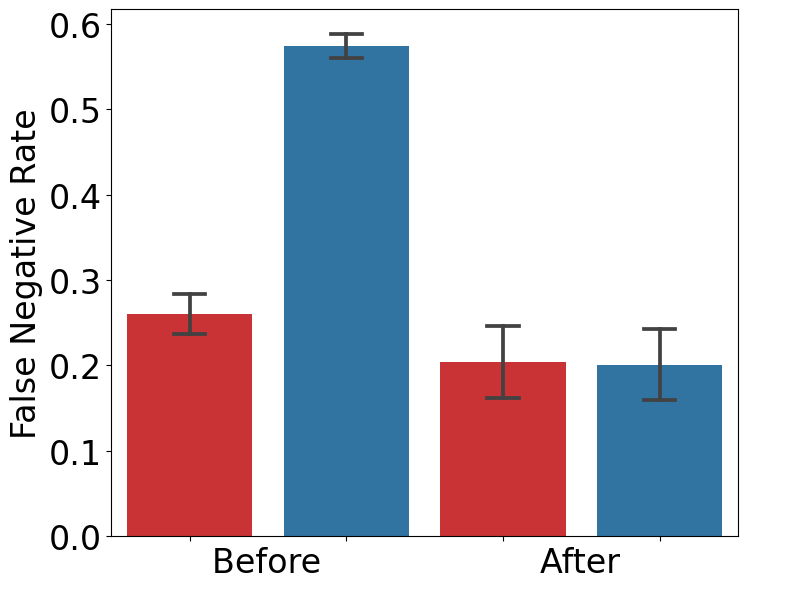

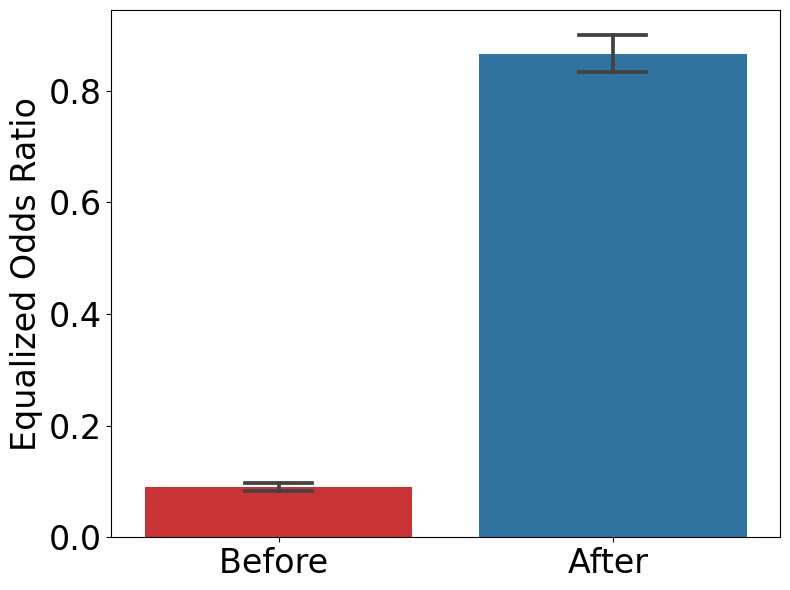

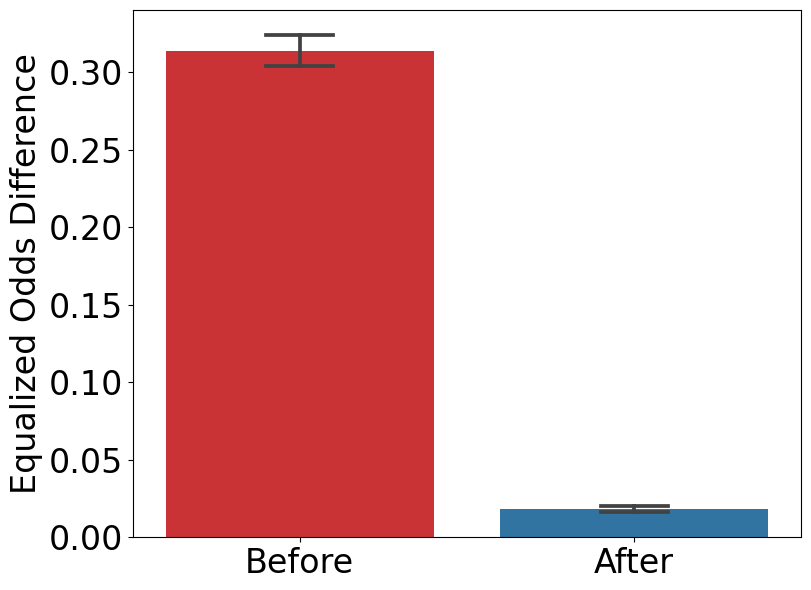

In [7]:
# define the age metrics
# set up the color palette
# red for young, blue for old
# make barplots with error bars showing standard error

age_metrics = {
    "False Negative Rate": ["Young Before", "Old Before", "Young After", "Old After"],
    "Equalized Odds Ratio": ["Before ", "After "],
    "Equalized Odds Difference": ["Before", "After"],
}

for metric, columns in age_metrics.items():
    for column in columns:
        if "Young" in column:
            palette[column] = plt.cm.Paired(5)
        elif "Old" in column:
            palette[column] = plt.cm.Paired(1)
        elif "Before" in column:
            palette[column] = plt.cm.Paired(5)
        else:
            palette[column] = plt.cm.Paired(1)
            
for metric, columns in age_metrics.items():
    plt.figure(figsize = (8, 6))
    
    eo_results_age_metric = eo_results_age[columns]
    eo_results_age_metric_melted = eo_results_age_metric.melt(var_name = "Age", value_name = metric)
    
    age = sns.barplot(x = "Age", y = metric, data = eo_results_age_metric_melted, estimator = np.mean, 
                errorbar = "se", capsize = 0.2, palette = palette)
        
    
    if metric == "False Negative Rate":
        age.set_xticks(range(4))
        age.set_xticklabels(["", "Before               ", "", 
                             "After               "])
    
    plt.xlabel("")
    plt.ylabel(metric)
    plt.rc("ytick", labelsize = 24)
    plt.rc("xtick", labelsize = 24)
    plt.rc('axes', labelsize = 24)

    plt.tight_layout()
    
    plt.savefig("coughvid age " + metric.lower() + ".png", dpi = 300)
    
    plt.show()